## Trabajo práctico

In [5]:
#Nuestros datos son al formato CSV : 
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import imblearn

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter



In [6]:
df = pd.read_csv("SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


Diré cada dato que me entrega la tabla.<br>
1) **Objid** = id <br>
2) **ra** = ascención recta en grados.<br>
3) **dec** = Declinación en grados.<br>
4) **u,g,ri,z** = Magnitud de los objetos en el SDSS<br>
5) **run** = Número del escaneo<br>
6) **rerun** tipo de procesamiento que se hace al escaneo<br>
7) **camcol** = Es la salida de una columna de cámara de ssd como parte de un run.<br>
8) **field** = Parte del camcol que es procesada por el photo pipeline<br>
9) **specobjid** = Identificación de 64 bits.<br>
10) **class** = Galaxy, QSO o star.<br>
11) **redshift** = Medida de la velocidad de recesión de una galaxia u otro objeto del cielo. <br>
12) **plate** = Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio.<br>
13) **mjd** = Fecha en que se tomo una muestra de datos de SDSS.<br>
14) **fiberid** = Cada objeto tiene asignado un ID de fibra correspondiente.

In [7]:
#comprobando valores nulos
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<span style='background: salmon; color:white; font-size:32px;'> vemos que no se encuentran nulos. </span>

In [8]:
# cuantas informaciones hay 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [9]:
#cambio las letras por palabra.
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

In [10]:
#Elimino estos datos por que considero que no son relevantes para la predicción.
astronomia = df.drop(['objid','rerun','specobjid','mjd','fiberid'], 1)
astronomia.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306


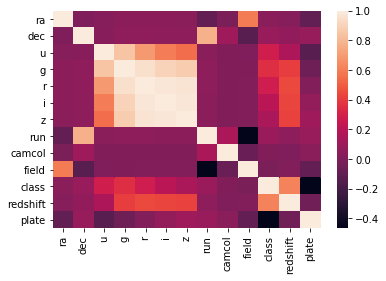

In [11]:
# mapa de calor para ver la correlación 
sb.heatmap(astronomia.corr())

A través del mapa de calor obtenido vamos a sacar la hay un correlación entre run y field, quitaré de mi predicción la variable run. Anque se vea negro, hice un testeo y se daba malos resultados, así que decidí no borrarlo.

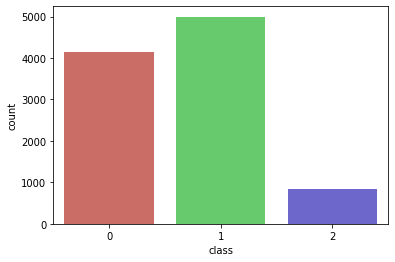

In [12]:
#pero tenemos un problema, tenemos más datos de es estrellas y galaxias, y muy pocos datos de quasar.
sb.countplot(x='class',data=astronomia, palette='hls')

## Vamos a corroborar si efectivamente eso afecta a nuestros datos. 

In [13]:
X = astronomia.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].values
y = astronomia.iloc[:,10].values # y contiene a class 

In [14]:
print(Counter(y))

Counter({1: 4998, 0: 4152, 2: 850})


In [15]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 25)

In [16]:
#balanceo del dataset de entrenamiento.
os = RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_train, y_train)


In [17]:
print(Counter(y_train_res))

Counter({0: 3790, 1: 3790, 2: 3790})


<span style='background: salmon; color:white; font-size:32px;'>He balanceado a partir de oversampling  </span>

In [18]:
LogReg = LogisticRegression(max_iter = 1000)
LogReg.fit(X_train_res, y_train_res)

C:\Users\cajap\Anaconda3\envs\proyecto\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 1, 0], dtype=int64)

In [20]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 916,  119,   56],
       [  88, 1112,    8],
       [   5,   11,  185]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1091
           1       0.90      0.92      0.91      1208
           2       0.74      0.92      0.82       201

    accuracy                           0.89      2500
   macro avg       0.85      0.89      0.87      2500
weighted avg       0.89      0.89      0.89      2500



Una clase tiene menos que el resto de datos.

In [24]:
#método Ordinary Least Squares (OLS) a partir de los datos de entrenamiento balanceado anteriormente.
import statsmodels.api as sm
est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              9945.
Date:                Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                        22:12:49   Log-Likelihood:                         -5149.2
No. Observations:               11370   AIC:                                  1.032e+04
Df Residuals:                   11358   BIC:                                  1.041e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
#función para la variable y, retornando a partir de la multiplicación de coeficientes
def predict_ast(ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate):
    return  -9.23e-05 * ra + dec * 0.0008 + u * -0.7903 + g * 1.3688 + r *0.3644 + i*-0.0227 + z * -0.8635 + run * 0.0001 + camcol *0.0026 + field *-2.055e-05+ redshift * 0.5610 + plate*-9.29e-05

In [36]:
#valor para 1 
predict_ast(183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287)

1.1599251068939012

In [37]:
#valor para la clase 0
predict_ast(183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306)

0.005500353010196912

In [38]:
#valor para la clase 2
predict_ast(184.350647,0.20723,18.73832,18.60962,18.39696,18.31174,17.97663,752,4,272,0.271937,287)



1.6183642572818997

In [39]:
#árbol de decisión
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)

In [40]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1082    7    2]
 [   2 1194   12]
 [   0   24  177]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1091
           1       0.97      0.99      0.98      1208
           2       0.93      0.88      0.90       201

    accuracy                           0.98      2500
   macro avg       0.97      0.95      0.96      2500
weighted avg       0.98      0.98      0.98      2500



In [41]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')

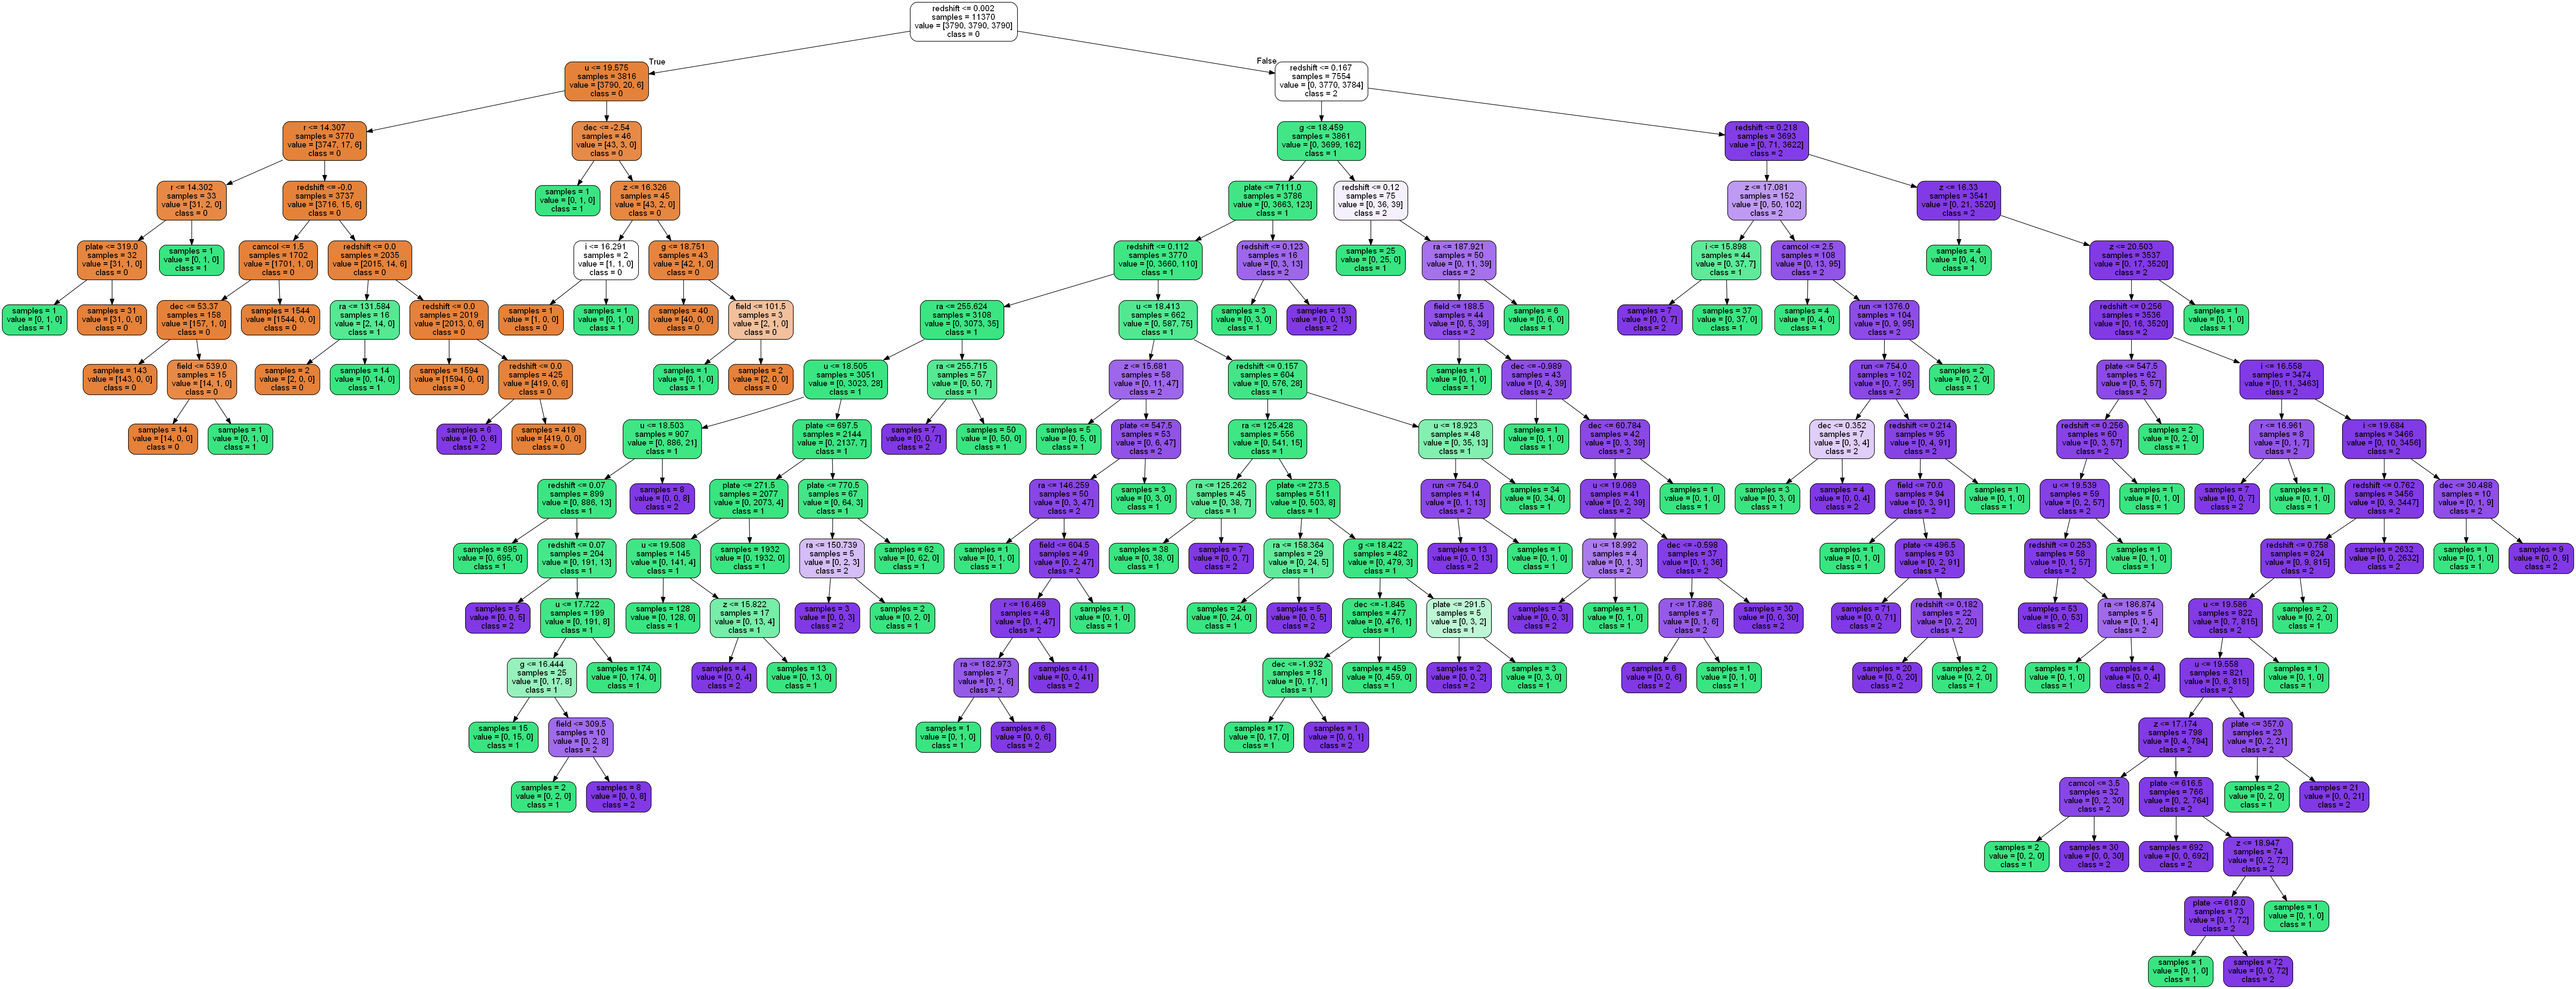

In [42]:
from IPython.display import Image
Image("modelo.png")